In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
import pykrige as pk

In [58]:
new_df = pd.read_csv('Wafermap.csv')
new_df['X'] = new_df['X'].astype('float64')
new_df['Y'] = new_df['Y'].astype('float64')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       315 non-null    float64
 1   Y       315 non-null    float64
 2   Value   8 non-null      float64
dtypes: float64(3)
memory usage: 7.5 KB


## Plot the data from the wafermap file

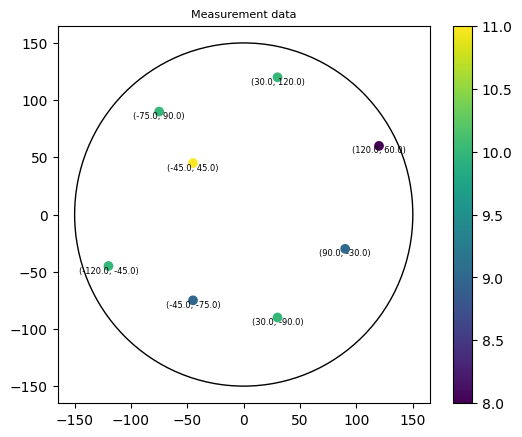

In [59]:
fig = plt.figure(figsize=(6,5),dpi=100)
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x=new_df['X'],y=new_df['Y'],c=new_df['Value'])

circ = plt.Circle((0, 0), radius=150,fill=None)
ax.add_patch(circ)

#ax.hlines(y=0,xmin=-150,xmax=150)
#ax.vlines(x=0,ymin=-150,ymax=150)

# for (xi, yi) in zip(new_df['X'].values, 
#                     new_df['Y'].values):
#     plt.text(xi, yi, (xi,yi), va='top', ha='center')

#Show points only for locations with measurement
for (xi, yi) in zip(new_df[new_df['Value'].notnull()]['X'].values, 
                    new_df[new_df['Value'].notnull()]['Y'].values):
    plt.text(xi, yi, (xi,yi), va='top', ha='center',size=6)

plt.title('Measurement data', size=8)
plt.colorbar()
plt.show()

## Create a Kriging model and plot the data

In [60]:
def generate_and_plot_kringing_model(new_df,model_type='linear'): 

    gridx = new_df['X']
    gridy = new_df['Y']

    OK = pk.OrdinaryKriging(
        new_df[new_df['Value'].notnull()]['X'].values,
        new_df[new_df['Value'].notnull()]['Y'].values,
        new_df[new_df['Value'].notnull()]['Value'].values,
        variogram_model="linear",
        verbose=False,
        enable_plotting=False,
    )

    ###############################################################################
    # Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
    # grid of points, on a masked rectangular grid of points, or with arbitrary points.
    # (See OrdinaryKriging.__doc__ for more information.)

    z, ss = OK.execute("points", gridx, gridy)
    print(ss.shape)

    ###############################################################################
    # Writes the kriged grid to an ASCII grid file and plot it.

    #kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
    fig = plt.figure(figsize=(6,5),dpi=100)
    ax = fig.add_subplot(1, 1, 1)

    circ = plt.Circle((0, 0), radius=150,fill=None)
    ax.add_patch(circ)

    plt.scatter(x=gridx,
                y=gridy,
                c=z,
                marker='x',s=2)

    plt.scatter(x=new_df['X'],y=new_df['Y'],c=new_df['Value'])
    #plt.imshow(z)

    plt.title('Kringing data, larger points are the original measurements',size=8)
    plt.colorbar()
    plt.show()

(315,)


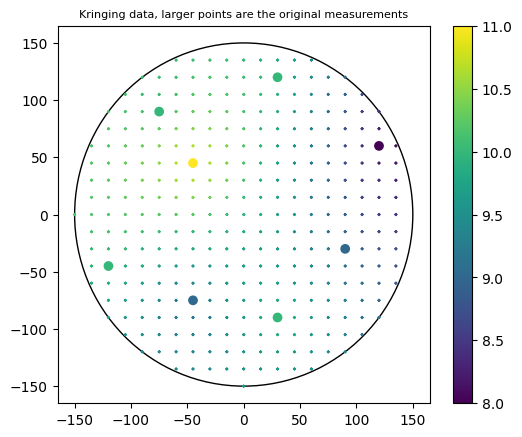

In [61]:
generate_and_plot_kringing_model(new_df,'linear')

(315,)


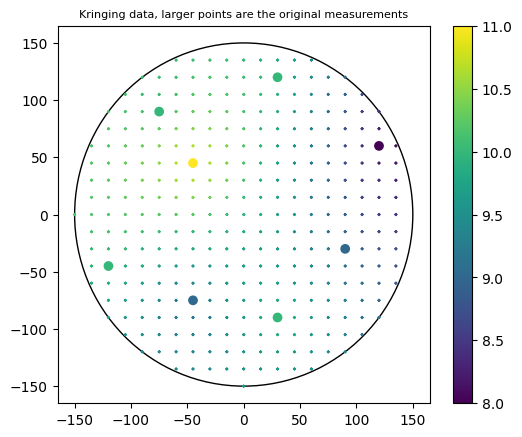

In [62]:
generate_and_plot_kringing_model(new_df,'gaussian')

(315,)


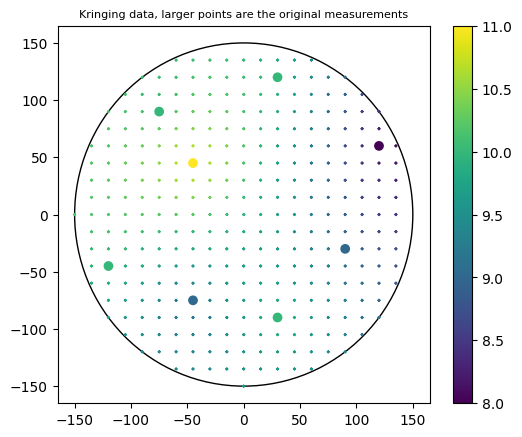

In [63]:
generate_and_plot_kringing_model(new_df,'spherical')

(315,)


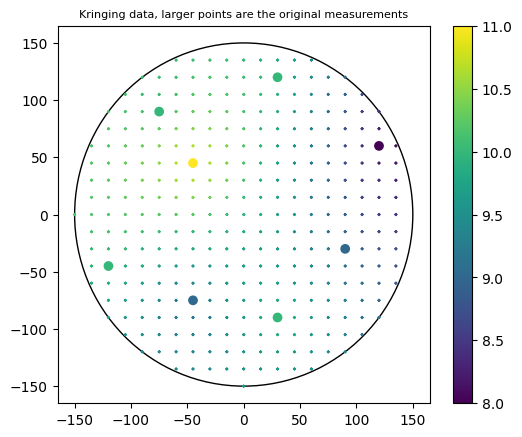

In [64]:
generate_and_plot_kringing_model(new_df,'exponential')